___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [6]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

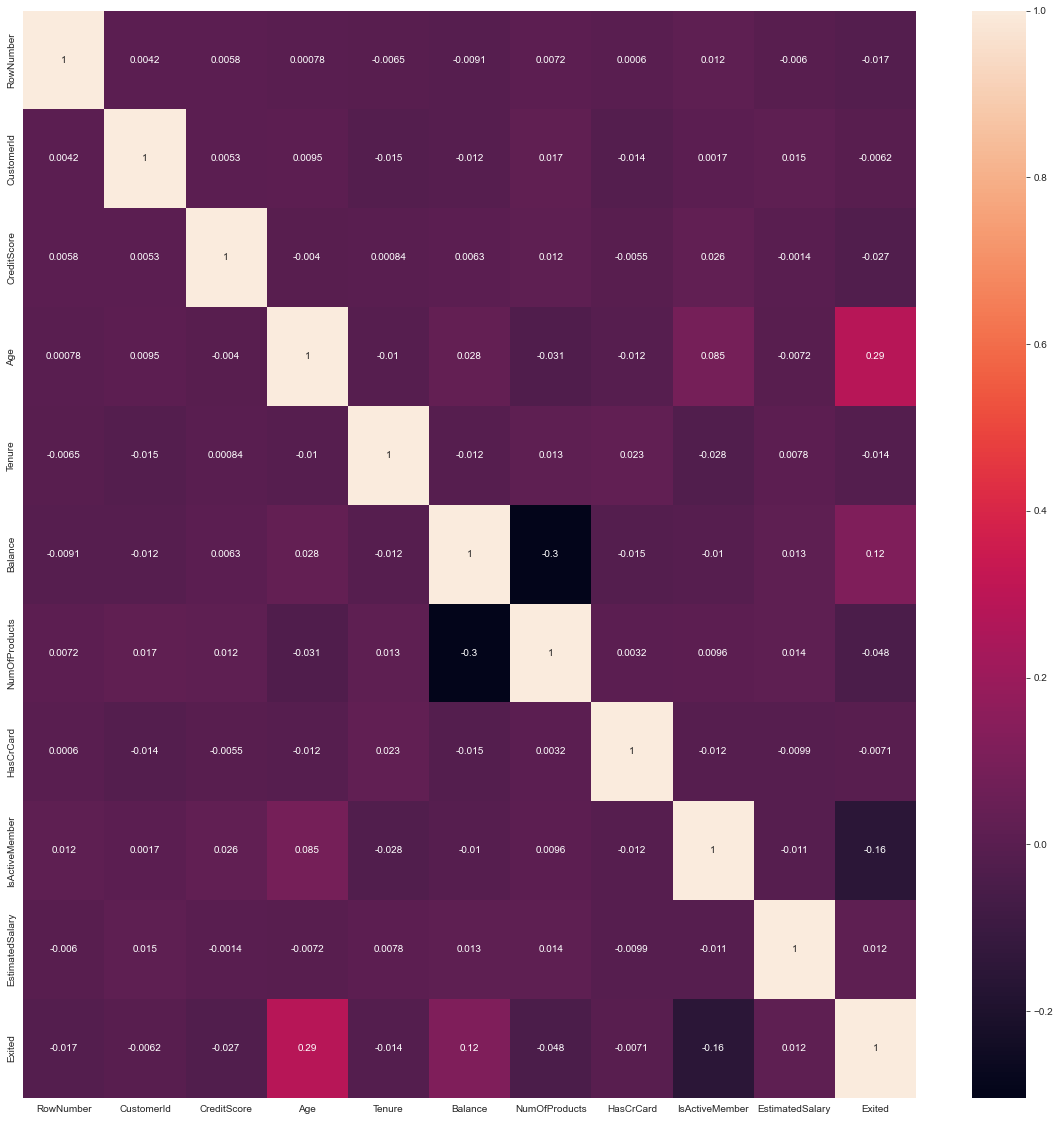

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df_copy = df

In [10]:
drop_list = ['RowNumber', 'CustomerId', 'Surname','Geography', 'Gender']

In [11]:
df = df.drop(drop_list, axis=1)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.000,1,1,1,101348.880,1
1,608,41,1,83807.860,1,0,1,112542.580,0
2,502,42,8,159660.800,3,1,0,113931.570,1
3,699,39,1,0.000,2,0,0,93826.630,0
4,850,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0
9996,516,35,10,57369.610,1,1,1,101699.770,0
9997,709,36,7,0.000,1,0,1,42085.580,1
9998,772,42,3,75075.310,2,1,0,92888.520,1


In [12]:
df.shape

(10000, 9)

<AxesSubplot:>

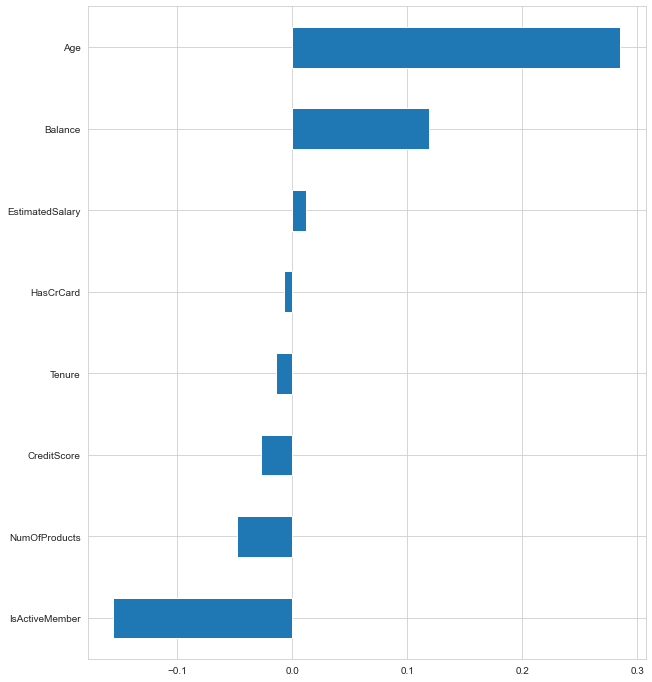

In [13]:
plt.figure(figsize= (10,12))
df.corr()['Exited'].sort_values().drop('Exited').plot(kind = "barh")

# Preprocessing of Data
- Train | Test Split, Scalling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 625.1 KB


In [18]:
X.shape

(10000, 8)

In [19]:
seed = 42

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train.shape

(9000, 8)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [25]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [26]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 500, verbose=1)

Epoch 1/500
64/64 [==============================] - 1s 5ms/step - loss: 0.6854 - accuracy: 0.5636 - val_loss: 0.5866 - val_accuracy: 0.7989
Epoch 2/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.7960 - val_loss: 0.5008 - val_accuracy: 0.7989
Epoch 3/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7960 - val_loss: 0.4869 - val_accuracy: 0.7989
Epoch 4/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7960 - val_loss: 0.4759 - val_accuracy: 0.7989
Epoch 5/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7960 - val_loss: 0.4661 - val_accuracy: 0.7989
Epoch 6/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7960 - val_loss: 0.4568 - val_accuracy: 0.7989
Epoch 7/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7967 - val_loss: 0.4462 - val_accuracy: 0.8000
Epoch 8/500
6

Epoch 59/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8536 - val_loss: 0.3106 - val_accuracy: 0.8844
Epoch 60/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8546 - val_loss: 0.3091 - val_accuracy: 0.8789
Epoch 61/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8525 - val_loss: 0.3086 - val_accuracy: 0.8767
Epoch 62/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8533 - val_loss: 0.3118 - val_accuracy: 0.8844
Epoch 63/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8551 - val_loss: 0.3076 - val_accuracy: 0.8778
Epoch 64/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8548 - val_loss: 0.3101 - val_accuracy: 0.8778
Epoch 65/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8535 - val_loss: 0.3083 - val_accuracy: 0.8789
Epoch 

64/64 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8547 - val_loss: 0.3045 - val_accuracy: 0.8789
Epoch 117/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8565 - val_loss: 0.3080 - val_accuracy: 0.8789
Epoch 118/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.8573 - val_loss: 0.3047 - val_accuracy: 0.8756
Epoch 119/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8554 - val_loss: 0.3049 - val_accuracy: 0.8778
Epoch 120/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8553 - val_loss: 0.3049 - val_accuracy: 0.8756
Epoch 121/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8563 - val_loss: 0.3054 - val_accuracy: 0.8722
Epoch 122/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8556 - val_loss: 0.3045 - val_accuracy: 0.8744
Epoch 123/500

64/64 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8551 - val_loss: 0.3076 - val_accuracy: 0.8744
Epoch 174/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8588 - val_loss: 0.3038 - val_accuracy: 0.8711
Epoch 175/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8559 - val_loss: 0.3040 - val_accuracy: 0.8722
Epoch 176/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8564 - val_loss: 0.3037 - val_accuracy: 0.8767
Epoch 177/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8562 - val_loss: 0.3043 - val_accuracy: 0.8756
Epoch 178/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8572 - val_loss: 0.3065 - val_accuracy: 0.8789
Epoch 179/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8568 - val_loss: 0.3037 - val_accuracy: 0.8756
Epoch 180/500

64/64 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8578 - val_loss: 0.3020 - val_accuracy: 0.8756
Epoch 231/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8559 - val_loss: 0.3026 - val_accuracy: 0.8756
Epoch 232/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8580 - val_loss: 0.3050 - val_accuracy: 0.8756
Epoch 233/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8573 - val_loss: 0.3025 - val_accuracy: 0.8744
Epoch 234/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8575 - val_loss: 0.3062 - val_accuracy: 0.8778
Epoch 235/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8570 - val_loss: 0.3031 - val_accuracy: 0.8733
Epoch 236/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8573 - val_loss: 0.3060 - val_accuracy: 0.8778
Epoch 237/500

64/64 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8572 - val_loss: 0.3040 - val_accuracy: 0.8744
Epoch 288/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8584 - val_loss: 0.3032 - val_accuracy: 0.8756
Epoch 289/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8589 - val_loss: 0.3030 - val_accuracy: 0.8822
Epoch 290/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8580 - val_loss: 0.3010 - val_accuracy: 0.8756
Epoch 291/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8583 - val_loss: 0.3018 - val_accuracy: 0.8733
Epoch 292/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8565 - val_loss: 0.3038 - val_accuracy: 0.8789
Epoch 293/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.8588 - val_loss: 0.3025 - val_accuracy: 0.8756
Epoch 294/500

64/64 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8577 - val_loss: 0.3004 - val_accuracy: 0.8756
Epoch 345/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3447 - accuracy: 0.8578 - val_loss: 0.3012 - val_accuracy: 0.8789
Epoch 346/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8580 - val_loss: 0.3007 - val_accuracy: 0.8789
Epoch 347/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8574 - val_loss: 0.3021 - val_accuracy: 0.8800
Epoch 348/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8588 - val_loss: 0.3013 - val_accuracy: 0.8789
Epoch 349/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8572 - val_loss: 0.3014 - val_accuracy: 0.8778
Epoch 350/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8578 - val_loss: 0.3009 - val_accuracy: 0.8811
Epoch 351/500

64/64 [==============================] - 0s 2ms/step - loss: 0.3447 - accuracy: 0.8579 - val_loss: 0.3005 - val_accuracy: 0.8778
Epoch 402/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8568 - val_loss: 0.3034 - val_accuracy: 0.8733
Epoch 403/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8578 - val_loss: 0.3011 - val_accuracy: 0.8767
Epoch 404/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8588 - val_loss: 0.3036 - val_accuracy: 0.8756
Epoch 405/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8583 - val_loss: 0.3004 - val_accuracy: 0.8778
Epoch 406/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8596 - val_loss: 0.3002 - val_accuracy: 0.8800
Epoch 407/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8581 - val_loss: 0.3025 - val_accuracy: 0.8778
Epoch 408/500

64/64 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8599 - val_loss: 0.3015 - val_accuracy: 0.8800
Epoch 459/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8593 - val_loss: 0.3022 - val_accuracy: 0.8789
Epoch 460/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8584 - val_loss: 0.3009 - val_accuracy: 0.8789
Epoch 461/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8595 - val_loss: 0.3025 - val_accuracy: 0.8811
Epoch 462/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8581 - val_loss: 0.2999 - val_accuracy: 0.8811
Epoch 463/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8579 - val_loss: 0.3016 - val_accuracy: 0.8789
Epoch 464/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8588 - val_loss: 0.3015 - val_accuracy: 0.8789
Epoch 465/500

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [28]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.685,0.564,0.587,0.799
1,0.530,0.796,0.501,0.799
2,0.500,0.796,0.487,0.799
3,0.489,0.796,0.476,0.799
4,0.480,0.796,0.466,0.799


<AxesSubplot:>

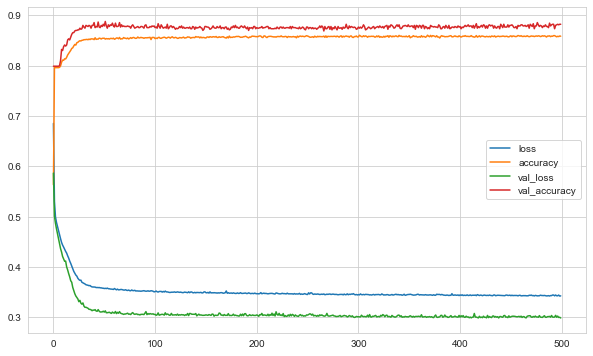

In [29]:
loss_df.plot()

In [30]:
model.evaluate(X_test, y_test, verbose=0)

[0.34947723150253296, 0.8479999899864197]

In [31]:
y_pred = model.predict(X_test) > 0.5

32/32 [==============================] - 0s 903us/step


In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[761  35]
 [117  87]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.71      0.43      0.53       204

    accuracy                           0.85      1000
   macro avg       0.79      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [33]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [34]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [35]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 500, verbose=1, class_weight=class_weights)

Epoch 1/500
64/64 [==============================] - 1s 4ms/step - loss: 0.6898 - accuracy: 0.2944 - val_loss: 0.7118 - val_accuracy: 0.4789
Epoch 2/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.4895 - val_loss: 0.7168 - val_accuracy: 0.5333
Epoch 3/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5264 - val_loss: 0.7099 - val_accuracy: 0.5878
Epoch 4/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5531 - val_loss: 0.6979 - val_accuracy: 0.6000
Epoch 5/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.5925 - val_loss: 0.6931 - val_accuracy: 0.6200
Epoch 6/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.6286 - val_loss: 0.6708 - val_accuracy: 0.6767
Epoch 7/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.6467 - val_loss: 0.6775 - val_accuracy: 0.6489
Epoch 8/500
6

Epoch 59/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7695 - val_loss: 0.4856 - val_accuracy: 0.7667
Epoch 60/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7667 - val_loss: 0.4343 - val_accuracy: 0.8200
Epoch 61/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.7674 - val_loss: 0.4363 - val_accuracy: 0.8156
Epoch 62/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7705 - val_loss: 0.4874 - val_accuracy: 0.7533
Epoch 63/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7678 - val_loss: 0.4368 - val_accuracy: 0.8100
Epoch 64/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7658 - val_loss: 0.4494 - val_accuracy: 0.7978
Epoch 65/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7715 - val_loss: 0.4272 - val_accuracy: 0.8167
Epoch 

64/64 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7740 - val_loss: 0.4534 - val_accuracy: 0.7811
Epoch 117/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7685 - val_loss: 0.4397 - val_accuracy: 0.8011
Epoch 118/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7721 - val_loss: 0.4290 - val_accuracy: 0.8167
Epoch 119/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7731 - val_loss: 0.4466 - val_accuracy: 0.7944
Epoch 120/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7740 - val_loss: 0.4171 - val_accuracy: 0.8222
Epoch 121/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7675 - val_loss: 0.4317 - val_accuracy: 0.8111
Epoch 122/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7635 - val_loss: 0.4190 - val_accuracy: 0.8211
Epoch 123/500

64/64 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7693 - val_loss: 0.4423 - val_accuracy: 0.7900
Epoch 174/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7737 - val_loss: 0.4159 - val_accuracy: 0.8233
Epoch 175/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7711 - val_loss: 0.4173 - val_accuracy: 0.8189
Epoch 176/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7706 - val_loss: 0.4199 - val_accuracy: 0.8133
Epoch 177/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7756 - val_loss: 0.4610 - val_accuracy: 0.7644
Epoch 178/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7705 - val_loss: 0.4596 - val_accuracy: 0.7678
Epoch 179/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7681 - val_loss: 0.4250 - val_accuracy: 0.8078
Epoch 180/500

64/64 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7732 - val_loss: 0.4225 - val_accuracy: 0.8067
Epoch 231/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7743 - val_loss: 0.4346 - val_accuracy: 0.7933
Epoch 232/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7767 - val_loss: 0.4456 - val_accuracy: 0.7733
Epoch 233/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7733 - val_loss: 0.4190 - val_accuracy: 0.8111
Epoch 234/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7754 - val_loss: 0.4632 - val_accuracy: 0.7656
Epoch 235/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7722 - val_loss: 0.4415 - val_accuracy: 0.7844
Epoch 236/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7768 - val_loss: 0.4353 - val_accuracy: 0.8078
Epoch 237/500

64/64 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7670 - val_loss: 0.4193 - val_accuracy: 0.8200
Epoch 288/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.7689 - val_loss: 0.4439 - val_accuracy: 0.7822
Epoch 289/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7781 - val_loss: 0.4383 - val_accuracy: 0.7911
Epoch 290/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7730 - val_loss: 0.4173 - val_accuracy: 0.8167
Epoch 291/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7730 - val_loss: 0.3992 - val_accuracy: 0.8356
Epoch 292/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7783 - val_loss: 0.4587 - val_accuracy: 0.7744
Epoch 293/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7740 - val_loss: 0.4267 - val_accuracy: 0.8178
Epoch 294/500

64/64 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7754 - val_loss: 0.4362 - val_accuracy: 0.7944
Epoch 345/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7791 - val_loss: 0.4377 - val_accuracy: 0.7922
Epoch 346/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7754 - val_loss: 0.4412 - val_accuracy: 0.7900
Epoch 347/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7794 - val_loss: 0.4505 - val_accuracy: 0.7789
Epoch 348/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.7764 - val_loss: 0.4459 - val_accuracy: 0.7756
Epoch 349/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.7727 - val_loss: 0.4202 - val_accuracy: 0.8133
Epoch 350/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.7779 - val_loss: 0.4218 - val_accuracy: 0.8189
Epoch 351/500

64/64 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7799 - val_loss: 0.4520 - val_accuracy: 0.7844
Epoch 402/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7693 - val_loss: 0.3869 - val_accuracy: 0.8389
Epoch 403/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7754 - val_loss: 0.4355 - val_accuracy: 0.7933
Epoch 404/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.7736 - val_loss: 0.4218 - val_accuracy: 0.8233
Epoch 405/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7770 - val_loss: 0.4122 - val_accuracy: 0.8267
Epoch 406/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.7769 - val_loss: 0.4429 - val_accuracy: 0.7833
Epoch 407/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7721 - val_loss: 0.4489 - val_accuracy: 0.7844
Epoch 408/500

64/64 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7780 - val_loss: 0.4477 - val_accuracy: 0.7800
Epoch 459/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.7748 - val_loss: 0.4254 - val_accuracy: 0.8089
Epoch 460/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7715 - val_loss: 0.4093 - val_accuracy: 0.8278
Epoch 461/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7772 - val_loss: 0.4405 - val_accuracy: 0.7878
Epoch 462/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7758 - val_loss: 0.4299 - val_accuracy: 0.8011
Epoch 463/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.7721 - val_loss: 0.4200 - val_accuracy: 0.8156
Epoch 464/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7737 - val_loss: 0.4218 - val_accuracy: 0.8133
Epoch 465/500

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [37]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.690,0.294,0.712,0.479
1,0.684,0.490,0.717,0.533
2,0.678,0.526,0.710,0.588
3,0.671,0.553,0.698,0.600
4,0.663,0.592,0.693,0.620


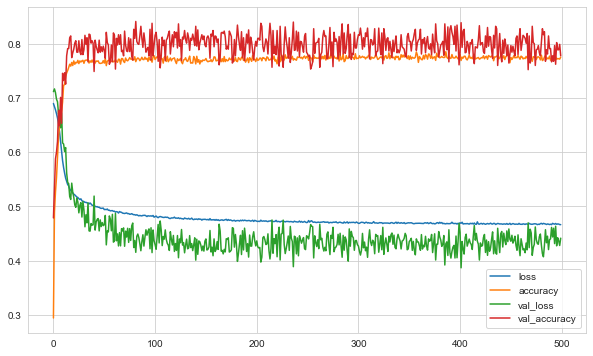

In [38]:
loss_df.plot();

In [39]:
model.evaluate(X_test, y_test, verbose=0)

[0.486436665058136, 0.753000020980835]

In [40]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.486436665058136
accuracy :  0.753000020980835


In [41]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1000us/step
[[595 201]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       796
           1       0.44      0.77      0.56       204

    accuracy                           0.75      1000
   macro avg       0.68      0.76      0.69      1000
weighted avg       0.83      0.75      0.77      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [42]:
from tensorflow.keras.optimizers import Adam

In [43]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate= 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [44]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 500, verbose=1, class_weight=class_weights)

Epoch 1/500
64/64 [==============================] - 1s 4ms/step - loss: 0.6721 - accuracy: 0.4596 - val_loss: 0.7111 - val_accuracy: 0.5756
Epoch 2/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6058 - val_loss: 0.6942 - val_accuracy: 0.6144
Epoch 3/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.6419 - val_loss: 0.6421 - val_accuracy: 0.6878
Epoch 4/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.6917 - val_loss: 0.5821 - val_accuracy: 0.7444
Epoch 5/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7354 - val_loss: 0.5480 - val_accuracy: 0.7978
Epoch 6/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7531 - val_loss: 0.5298 - val_accuracy: 0.7878
Epoch 7/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7631 - val_loss: 0.5264 - val_accuracy: 0.8033
Epoch 8/500
6

Epoch 59/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7742 - val_loss: 0.4590 - val_accuracy: 0.7911
Epoch 60/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7853 - val_loss: 0.4165 - val_accuracy: 0.8300
Epoch 61/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7817 - val_loss: 0.4481 - val_accuracy: 0.8000
Epoch 62/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7806 - val_loss: 0.4592 - val_accuracy: 0.8000
Epoch 63/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7831 - val_loss: 0.4644 - val_accuracy: 0.7822
Epoch 64/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7795 - val_loss: 0.4937 - val_accuracy: 0.7478
Epoch 65/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7823 - val_loss: 0.4258 - val_accuracy: 0.8267
Epoch 

64/64 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7890 - val_loss: 0.4561 - val_accuracy: 0.7800
Epoch 117/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7805 - val_loss: 0.4686 - val_accuracy: 0.7789
Epoch 118/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7844 - val_loss: 0.4291 - val_accuracy: 0.8089
Epoch 119/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.7842 - val_loss: 0.4426 - val_accuracy: 0.8067
Epoch 120/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7847 - val_loss: 0.4191 - val_accuracy: 0.8267
Epoch 121/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7852 - val_loss: 0.4521 - val_accuracy: 0.7833
Epoch 122/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.7769 - val_loss: 0.4070 - val_accuracy: 0.8356
Epoch 123/500

64/64 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7901 - val_loss: 0.4438 - val_accuracy: 0.7900
Epoch 174/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7809 - val_loss: 0.4025 - val_accuracy: 0.8356
Epoch 175/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7832 - val_loss: 0.4121 - val_accuracy: 0.8322
Epoch 176/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7874 - val_loss: 0.4229 - val_accuracy: 0.8211
Epoch 177/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7878 - val_loss: 0.4454 - val_accuracy: 0.8011
Epoch 178/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7842 - val_loss: 0.4767 - val_accuracy: 0.7744
Epoch 179/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.7833 - val_loss: 0.4124 - val_accuracy: 0.8344
Epoch 180/500

64/64 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7874 - val_loss: 0.4107 - val_accuracy: 0.8333
Epoch 231/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7888 - val_loss: 0.4519 - val_accuracy: 0.7778
Epoch 232/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7802 - val_loss: 0.4495 - val_accuracy: 0.7878
Epoch 233/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.7878 - val_loss: 0.4380 - val_accuracy: 0.8000
Epoch 234/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7837 - val_loss: 0.4810 - val_accuracy: 0.7656
Epoch 235/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.7854 - val_loss: 0.4267 - val_accuracy: 0.8078
Epoch 236/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7894 - val_loss: 0.4697 - val_accuracy: 0.7867
Epoch 237/500

64/64 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7807 - val_loss: 0.4135 - val_accuracy: 0.8233
Epoch 288/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7846 - val_loss: 0.4475 - val_accuracy: 0.7967
Epoch 289/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7896 - val_loss: 0.4696 - val_accuracy: 0.7789
Epoch 290/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7826 - val_loss: 0.4392 - val_accuracy: 0.8056
Epoch 291/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.7822 - val_loss: 0.4097 - val_accuracy: 0.8356
Epoch 292/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7802 - val_loss: 0.4530 - val_accuracy: 0.7844
Epoch 293/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7860 - val_loss: 0.4338 - val_accuracy: 0.8056
Epoch 294/500

64/64 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7886 - val_loss: 0.4331 - val_accuracy: 0.8056
Epoch 345/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.7853 - val_loss: 0.4607 - val_accuracy: 0.7789
Epoch 346/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.7854 - val_loss: 0.4199 - val_accuracy: 0.8156
Epoch 347/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.7915 - val_loss: 0.4517 - val_accuracy: 0.7889
Epoch 348/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7865 - val_loss: 0.4408 - val_accuracy: 0.7944
Epoch 349/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7831 - val_loss: 0.4125 - val_accuracy: 0.8300
Epoch 350/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7937 - val_loss: 0.4566 - val_accuracy: 0.7778
Epoch 351/500

64/64 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7898 - val_loss: 0.4386 - val_accuracy: 0.8056
Epoch 402/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.7846 - val_loss: 0.4068 - val_accuracy: 0.8322
Epoch 403/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7922 - val_loss: 0.4486 - val_accuracy: 0.7944
Epoch 404/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.7849 - val_loss: 0.4104 - val_accuracy: 0.8300
Epoch 405/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7878 - val_loss: 0.4476 - val_accuracy: 0.7933
Epoch 406/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.7885 - val_loss: 0.4456 - val_accuracy: 0.7922
Epoch 407/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7858 - val_loss: 0.4511 - val_accuracy: 0.7922
Epoch 408/500

64/64 [==============================] - 0s 4ms/step - loss: 0.4505 - accuracy: 0.7901 - val_loss: 0.4551 - val_accuracy: 0.7856
Epoch 459/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.7933 - val_loss: 0.4369 - val_accuracy: 0.7944
Epoch 460/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4515 - accuracy: 0.7879 - val_loss: 0.4320 - val_accuracy: 0.8122
Epoch 461/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4499 - accuracy: 0.7906 - val_loss: 0.4548 - val_accuracy: 0.7911
Epoch 462/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4512 - accuracy: 0.7891 - val_loss: 0.4418 - val_accuracy: 0.7978
Epoch 463/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7868 - val_loss: 0.3982 - val_accuracy: 0.8333
Epoch 464/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7883 - val_loss: 0.4134 - val_accuracy: 0.8244
Epoch 465/500

<AxesSubplot:>

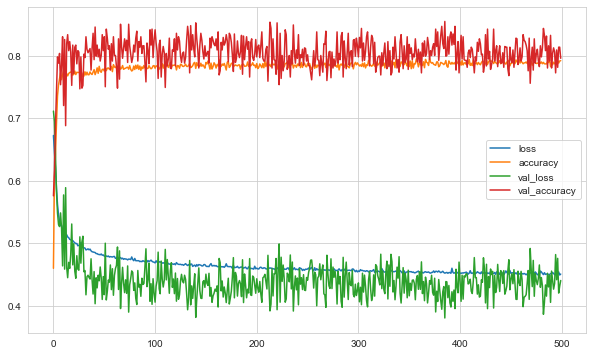

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [46]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.49100667238235474
accuracy :  0.7609999775886536


In [47]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 903us/step
[[609 187]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       796
           1       0.45      0.75      0.56       204

    accuracy                           0.76      1000
   macro avg       0.68      0.76      0.70      1000
weighted avg       0.82      0.76      0.78      1000



### Add Dropout Layer

In [48]:
from tensorflow.keras.layers import Dropout

In [49]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate= 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [50]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 500, verbose=1, class_weight=class_weights)

Epoch 1/500
64/64 [==============================] - 1s 5ms/step - loss: 0.6951 - accuracy: 0.2705 - val_loss: 0.6968 - val_accuracy: 0.2011
Epoch 2/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.2468 - val_loss: 0.6964 - val_accuracy: 0.2011
Epoch 3/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.2419 - val_loss: 0.6955 - val_accuracy: 0.2011
Epoch 4/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.2601 - val_loss: 0.6969 - val_accuracy: 0.2011
Epoch 5/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.3358 - val_loss: 0.6971 - val_accuracy: 0.2011
Epoch 6/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.2823 - val_loss: 0.6780 - val_accuracy: 0.5267
Epoch 7/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.2994 - val_loss: 0.6660 - val_accuracy: 0.6033
Epoch 8/500
6

Epoch 59/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7240 - val_loss: 0.5213 - val_accuracy: 0.8000
Epoch 60/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.7386 - val_loss: 0.5195 - val_accuracy: 0.7900
Epoch 61/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.7256 - val_loss: 0.5242 - val_accuracy: 0.8044
Epoch 62/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7449 - val_loss: 0.5395 - val_accuracy: 0.7556
Epoch 63/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7389 - val_loss: 0.5165 - val_accuracy: 0.8200
Epoch 64/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.7449 - val_loss: 0.5162 - val_accuracy: 0.8144
Epoch 65/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7348 - val_loss: 0.5251 - val_accuracy: 0.8044
Epoch 

64/64 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7262 - val_loss: 0.5472 - val_accuracy: 0.7222
Epoch 117/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.7330 - val_loss: 0.5023 - val_accuracy: 0.7989
Epoch 118/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7220 - val_loss: 0.5320 - val_accuracy: 0.7567
Epoch 119/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.7331 - val_loss: 0.5212 - val_accuracy: 0.7711
Epoch 120/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.7238 - val_loss: 0.5026 - val_accuracy: 0.8033
Epoch 121/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.7374 - val_loss: 0.5273 - val_accuracy: 0.7744
Epoch 122/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7223 - val_loss: 0.5132 - val_accuracy: 0.7822
Epoch 123/500

64/64 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.7435 - val_loss: 0.4956 - val_accuracy: 0.7878
Epoch 174/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.7270 - val_loss: 0.4865 - val_accuracy: 0.8278
Epoch 175/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7296 - val_loss: 0.5053 - val_accuracy: 0.8233
Epoch 176/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7294 - val_loss: 0.5072 - val_accuracy: 0.7933
Epoch 177/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.7414 - val_loss: 0.4926 - val_accuracy: 0.8356
Epoch 178/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.7269 - val_loss: 0.5050 - val_accuracy: 0.7944
Epoch 179/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.7432 - val_loss: 0.5126 - val_accuracy: 0.7878
Epoch 180/500

64/64 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.7265 - val_loss: 0.5008 - val_accuracy: 0.7911
Epoch 231/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7301 - val_loss: 0.5052 - val_accuracy: 0.7767
Epoch 232/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.7319 - val_loss: 0.5106 - val_accuracy: 0.7822
Epoch 233/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7311 - val_loss: 0.5077 - val_accuracy: 0.7933
Epoch 234/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.7374 - val_loss: 0.5259 - val_accuracy: 0.7544
Epoch 235/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7307 - val_loss: 0.5122 - val_accuracy: 0.7800
Epoch 236/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7212 - val_loss: 0.5012 - val_accuracy: 0.8111
Epoch 237/500

64/64 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.7202 - val_loss: 0.5065 - val_accuracy: 0.7967
Epoch 288/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.7457 - val_loss: 0.5060 - val_accuracy: 0.8011
Epoch 289/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.7333 - val_loss: 0.5162 - val_accuracy: 0.7800
Epoch 290/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.7183 - val_loss: 0.5092 - val_accuracy: 0.7822
Epoch 291/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.7184 - val_loss: 0.5297 - val_accuracy: 0.7644
Epoch 292/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.7465 - val_loss: 0.5028 - val_accuracy: 0.7867
Epoch 293/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.7231 - val_loss: 0.5275 - val_accuracy: 0.7522
Epoch 294/500

64/64 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.7352 - val_loss: 0.5052 - val_accuracy: 0.8067
Epoch 345/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7369 - val_loss: 0.5055 - val_accuracy: 0.8000
Epoch 346/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.7289 - val_loss: 0.5068 - val_accuracy: 0.7944
Epoch 347/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.7235 - val_loss: 0.5497 - val_accuracy: 0.7311
Epoch 348/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.7349 - val_loss: 0.5235 - val_accuracy: 0.7800
Epoch 349/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7210 - val_loss: 0.5089 - val_accuracy: 0.7856
Epoch 350/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7368 - val_loss: 0.5272 - val_accuracy: 0.7733
Epoch 351/500

64/64 [==============================] - 0s 3ms/step - loss: 0.6033 - accuracy: 0.7289 - val_loss: 0.5034 - val_accuracy: 0.8089
Epoch 402/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.7226 - val_loss: 0.4941 - val_accuracy: 0.8089
Epoch 403/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.7390 - val_loss: 0.5061 - val_accuracy: 0.8044
Epoch 404/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.7289 - val_loss: 0.5053 - val_accuracy: 0.8156
Epoch 405/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7270 - val_loss: 0.5223 - val_accuracy: 0.7822
Epoch 406/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.7395 - val_loss: 0.5022 - val_accuracy: 0.8178
Epoch 407/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.7363 - val_loss: 0.5395 - val_accuracy: 0.7622
Epoch 408/500

64/64 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.7235 - val_loss: 0.4881 - val_accuracy: 0.8278
Epoch 459/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7319 - val_loss: 0.5180 - val_accuracy: 0.7833
Epoch 460/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.7307 - val_loss: 0.5219 - val_accuracy: 0.7633
Epoch 461/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7421 - val_loss: 0.5312 - val_accuracy: 0.7600
Epoch 462/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.7340 - val_loss: 0.5042 - val_accuracy: 0.8033
Epoch 463/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.7344 - val_loss: 0.5019 - val_accuracy: 0.8111
Epoch 464/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.7351 - val_loss: 0.5130 - val_accuracy: 0.7889
Epoch 465/500

<AxesSubplot:>

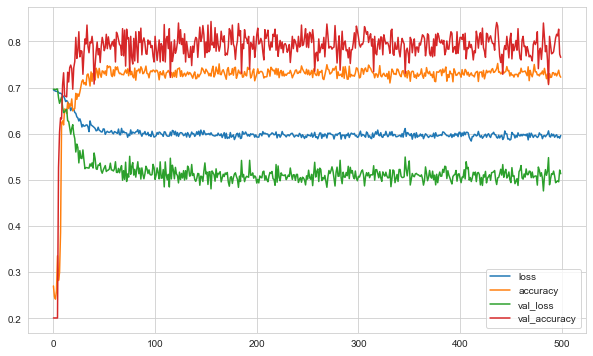

In [51]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [52]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5371305346488953
accuracy :  0.7540000081062317


In [53]:
y_pred = model.predict(X_test) > 0.5

32/32 [==============================] - 0s 935us/step


In [54]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[594 202]
 [ 44 160]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       796
           1       0.44      0.78      0.57       204

    accuracy                           0.75      1000
   macro avg       0.69      0.77      0.70      1000
weighted avg       0.83      0.75      0.77      1000



### Add Early Stop

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [56]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate= 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [57]:
early_stop_val_loss = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [59]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 500,
          verbose=1,
          class_weight=class_weights,
          callbacks = [early_stop_val_loss]
         )

Epoch 1/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6114 - accuracy: 0.7353 - val_loss: 0.5120 - val_accuracy: 0.8144
Epoch 2/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.7268 - val_loss: 0.5126 - val_accuracy: 0.8144
Epoch 3/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.7293 - val_loss: 0.5125 - val_accuracy: 0.8167
Epoch 4/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7116 - val_loss: 0.5131 - val_accuracy: 0.8011
Epoch 5/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.7336 - val_loss: 0.5145 - val_accuracy: 0.7978
Epoch 6/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.7160 - val_loss: 0.5362 - val_accuracy: 0.7744
Epoch 7/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.7249 - val_loss: 0.5151 - val_accuracy: 0.8122
Epoch 8/500
6

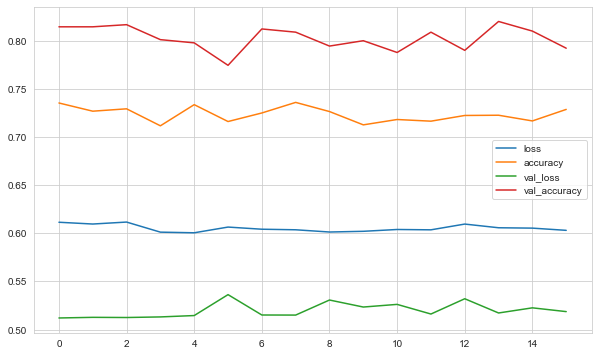

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [61]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.538838803768158
accuracy :  0.7670000195503235


In [62]:
y_pred = model.predict(X_test) > 0.5

32/32 [==============================] - 0s 935us/step


In [63]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[629 167]
 [ 66 138]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       796
           1       0.45      0.68      0.54       204

    accuracy                           0.77      1000
   macro avg       0.68      0.73      0.69      1000
weighted avg       0.81      0.77      0.78      1000



#### Monitor the "val_recall" as metric

In [64]:
early_stop_val_recall = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [65]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate= 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [66]:
model.fit(x = X_train,
          y = y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs = 500,
          verbose=1,
          class_weight=class_weights,
          callbacks = [early_stop_val_recall]
         )

Epoch 1/500
64/64 [==============================] - 1s 5ms/step - loss: 0.6955 - recall: 0.3063 - val_loss: 0.6796 - val_recall: 0.0000e+00
Epoch 2/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6888 - recall: 0.2458 - val_loss: 0.6773 - val_recall: 0.1160
Epoch 3/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6869 - recall: 0.3002 - val_loss: 0.6741 - val_recall: 0.5028
Epoch 4/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6829 - recall: 0.2863 - val_loss: 0.6699 - val_recall: 0.5470
Epoch 5/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6787 - recall: 0.3069 - val_loss: 0.6602 - val_recall: 0.5028
Epoch 6/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6722 - recall: 0.3517 - val_loss: 0.6425 - val_recall: 0.3370
Epoch 7/500
64/64 [==============================] - 0s 2ms/step - loss: 0.6669 - recall: 0.3396 - val_loss: 0.6396 - val_recall: 0.5028
Epoch 8/500
64/64 [==================

64/64 [==============================] - 0s 3ms/step - loss: 0.6155 - recall: 0.4933 - val_loss: 0.5327 - val_recall: 0.6077
Epoch 61/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6189 - recall: 0.4903 - val_loss: 0.5227 - val_recall: 0.6133
Epoch 62/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6154 - recall: 0.4576 - val_loss: 0.5458 - val_recall: 0.7238
Epoch 63/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6200 - recall: 0.4885 - val_loss: 0.5329 - val_recall: 0.6188
Epoch 64/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6198 - recall: 0.5115 - val_loss: 0.5561 - val_recall: 0.8066
Epoch 65/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6190 - recall: 0.4897 - val_loss: 0.5283 - val_recall: 0.6188
Epoch 66/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6065 - recall: 0.4927 - val_loss: 0.5277 - val_recall: 0.6409
Epoch 67/500
64/64 [===========================

<AxesSubplot:>

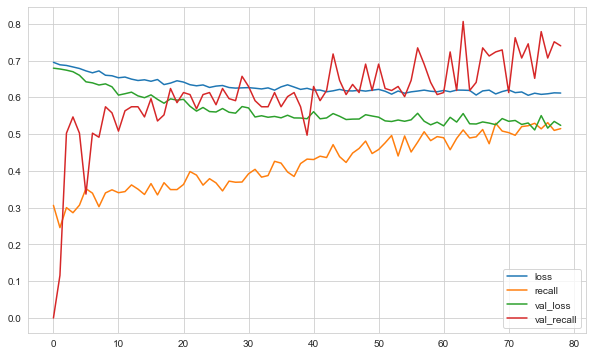

In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [68]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5774813294410706
accuracy :  0.7401960492134094


In [69]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5774813294410706
accuracy :  0.7401960492134094


## GridSearchCV

In [70]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [71]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [72]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [73]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [74]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)
parameters = {'batch_size': [32, 64, 128],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}
grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Epoch 1/200
127/127 [==============================] - 1s 3ms/step - loss: 0.5828 - accuracy: 0.7937 - val_loss: 0.4923 - val_accuracy: 0.7989
Epoch 2/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.7960 - val_loss: 0.4735 - val_accuracy: 0.7989
Epoch 3/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7960 - val_loss: 0.4564 - val_accuracy: 0.7989
Epoch 4/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8053 - val_loss: 0.4275 - val_accuracy: 0.8356
Epoch 5/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8167 - val_loss: 0.4168 - val_accuracy: 0.8311
Epoch 6/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8188 - val_loss: 0.4065 - val_accuracy: 0.8422
Epoch 7/200
127/127 [==============================] - 0s 2ms/step - loss: 0.430

Epoch 56: early stopping


GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000025571FFA8B0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [75]:
grid_model.best_score_

0.8573333333333334

In [76]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.001,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [77]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
12,0.857,0.005,1,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
35,0.856,0.006,2,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
16,0.856,0.006,3,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
0,0.856,0.005,4,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
8,0.856,0.007,5,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
15,0.855,0.006,6,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
7,0.855,0.007,7,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
3,0.855,0.008,7,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
9,0.855,0.007,9,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
17,0.855,0.006,10,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [78]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1000us/step
[[770  26]
 [128  76]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.75      0.37      0.50       204

    accuracy                           0.85      1000
   macro avg       0.80      0.67      0.70      1000
weighted avg       0.83      0.85      0.82      1000



32/32 [==============================] - 0s 1ms/step


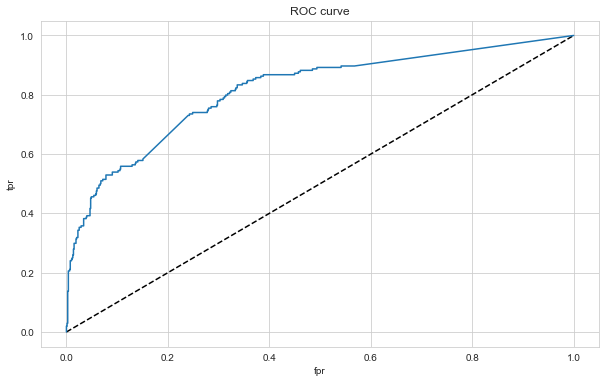

In [79]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Final Model and Model Deployment

In [97]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [98]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [99]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [100]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 500, verbose = 1,
          callbacks = [early_stop])

Epoch 1/500
141/141 [==============================] - 1s 3ms/step - loss: 0.5768 - accuracy: 0.7728 - val_loss: 0.5150 - val_accuracy: 0.7960
Epoch 2/500
141/141 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.7963 - val_loss: 0.4958 - val_accuracy: 0.7960
Epoch 3/500
141/141 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7963 - val_loss: 0.4794 - val_accuracy: 0.7960
Epoch 4/500
141/141 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7963 - val_loss: 0.4627 - val_accuracy: 0.7960
Epoch 5/500
141/141 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.7973 - val_loss: 0.4441 - val_accuracy: 0.7980
Epoch 6/500
141/141 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8054 - val_loss: 0.4189 - val_accuracy: 0.8150
Epoch 7/500
141/141 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8130 - val_loss: 0.3956 - val_accuracy: 0.8190

Epoch 58/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8591 - val_loss: 0.3681 - val_accuracy: 0.8460
Epoch 59/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8572 - val_loss: 0.3664 - val_accuracy: 0.8430
Epoch 60/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8563 - val_loss: 0.3658 - val_accuracy: 0.8430
Epoch 61/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8563 - val_loss: 0.3679 - val_accuracy: 0.8420
Epoch 62/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8562 - val_loss: 0.3662 - val_accuracy: 0.8430
Epoch 63/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8568 - val_loss: 0.3656 - val_accuracy: 0.8410
Epoch 64/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8562 - val_loss: 0.3656 - val_accuracy:

Epoch 115/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8576 - val_loss: 0.3630 - val_accuracy: 0.8440
Epoch 116/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8582 - val_loss: 0.3637 - val_accuracy: 0.8430
Epoch 117/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8582 - val_loss: 0.3622 - val_accuracy: 0.8450
Epoch 118/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8590 - val_loss: 0.3654 - val_accuracy: 0.8470
Epoch 119/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8582 - val_loss: 0.3598 - val_accuracy: 0.8470
Epoch 120/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8593 - val_loss: 0.3621 - val_accuracy: 0.8420
Epoch 121/500
141/141 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8580 - val_loss: 0.3655 - val_ac

<AxesSubplot:>

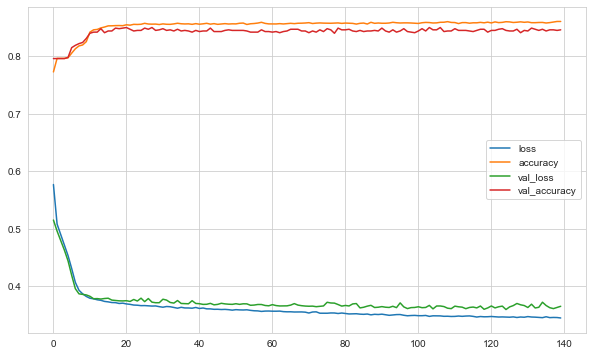

In [101]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [102]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3593581020832062
accuracy :  0.8450000286102295


In [103]:
model.save('model_churn.h5')

## Prediction

In [104]:
from tensorflow.keras.models import load_model

In [105]:
model_churn = load_model("model_churn.h5")
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [106]:
customer = df.drop("Exited", axis=1).iloc[0:1, :]

In [107]:
customer = scaler_churn.transform(customer)

In [108]:
customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489]])

In [109]:
(model_churn.predict(customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 76ms/step


array([[0]])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___